
# import lib

In [11]:
import json
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

def jaccard_similarity(a, b):
    a = set(a.split(" "))
    b = set(b.split(" "))
    j = float(len(a.intersection(b))) / len(a.union(b))
    return j

In [12]:
item_data = pd.read_pickle("item_data.pkl")
item_data

,item_id,shopid,item_name,item_price,item_rating,item_sold,cat_0,cat_1,cat_2,cat_3,item_ctime,item_brand_id,item_comment_count
0,4526109215,169520757,de khan robot ecovacs deebot ozmo 600 hang ch...,1500,5.000000,5,100010,100038,100177,0,1586505438,1801062,1
1,3673424387,326323525,noi nau cham cach thuy 08l bear sube001 ban q...,4500,4.857143,175,100010,100041,100206,0,1609827461,1247566,57
2,7392791903,136097133,noi com dien tu zojirushi 1 lit nsysq10xj han...,51990,5.000000,4,100010,100041,100207,0,1624596455,1802993,1
3,4496895370,264995867,may loc khong khi max air ma025 va 2 mang loc ...,19980,5.000000,2,100010,100038,100176,100458,1628331085,1250659,1
4,13052311517,65589552,luu sam3 giam 300k elsamhot giam 5 smart tivi...,240600,5.000000,10,100010,100040,100185,0,1637221639,1695294,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564,12771696200,597699842,tai nghe gaming bluetooth hosan flydigi cyberf...,13590,0.000000,0,100535,100578,0,0,1642561258,2313207,0
3565,5453943609,95303264,may nang co lg pral total lift up,90000,5.000000,28,100630,100663,100886,101663,1600845862,1255919,6
3566,13817642232,88201679,apple iphone 13 pro max 128gb,294900,4.895522,1052,100013,100073,0,0,1632744702,1189223,205
3567,7159085799,77877479,dau doc the nho hoco 2 trong 1 cong usb 30 us...,380,4.937500,230,100644,101940,101987,0,1603627153,0,64


pick random item as input

In [13]:
item_random = item_data.loc[[ np.random.randint(0,len(item_data),1)[0]]]
print("https://shopee.vn/-cLHC4151-i."+str(item_random["shopid"].values[0])+"."+str(item_random["item_id"].values[0]))
item_random

https://shopee.vn/-cLHC4151-i.20009052.4126119474


,item_id,shopid,item_name,item_price,item_rating,item_sold,cat_0,cat_1,cat_2,cat_3,item_ctime,item_brand_id,item_comment_count
635,4126119474,20009052,ma bmbau50 giam 50k don 150k quat hut thong gi...,3013,5.0,1,100010,100039,100181,100466,1586507821,1073820,1


## filter item

filter item with the same category and different shop

In [14]:
item_recommendation = item_data[
  (item_data['cat_2'] == item_random['cat_2'].values[0])
& (item_data['shopid'] != item_random['shopid'].values[0])
]
item_recommendation

,item_id,shopid,item_name,item_price,item_rating,item_sold,cat_0,cat_1,cat_2,cat_3,item_ctime,item_brand_id,item_comment_count
84,6453155884,34896130,quat lung thai lan benny bf41sl,9900,5.000000,4,100010,100039,100181,100466,1600425654,1070294,2
91,5237320236,136097133,quat tran panasonic 5 canh f60tan,58490,5.000000,5,100010,100039,100181,100466,1591755878,1695290,4
151,7942077488,76858527,may lam mat khong khi daikiosan dka03500c 25m...,42000,0.000000,0,100010,100039,100181,100465,1594699478,1247384,0
166,11161935781,106016295,dieu hoa 2 chieu casper 18000btu sh18fs32 tiet...,109000,0.000000,0,100010,100039,100181,100464,1634739976,1068917,0
167,3831384184,153476815,may lam mat khong khi sunhouse shd7734,29900,4.555556,18,100010,100039,100181,100465,1587654275,1134377,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,7088197256,254657873,elha gift quat hop asiavina f12001lv1 la ma,7900,4.924242,489,100010,100039,100181,100466,1620299104,1239311,198
3387,2595888014,142777053,quat sac mini de ban yoobao f04 6400mah xoay 7...,2890,4.942836,6047,100010,100039,100181,100466,1564730748,1802961,2696
3403,10981880038,152179638,ieu hoa 1 chieu casper 18000btu ec18tl22 hang ...,129000,0.000000,0,100010,100039,100181,100464,1641615874,1068917,0
3460,10626988839,142777053,quat sac mini de ban yoobao f2 pro 10000mah c...,4500,0.000000,8,100010,100039,100181,100466,1628827704,1802961,0


## create data variables when comparing input with other items

price_diff = different price between input and other

jaccard_name = jaccard metric between input name and other name

ctime_diff = the time the product is available in the shop


In [15]:
time_now = int(time.time())
scaler = MinMaxScaler()

item_recommendation["price_diff"] = item_recommendation['item_price'].apply(lambda x: abs(x - item_random['item_price'].values[0]))
item_recommendation["jaccard_name"] = item_recommendation['item_name'].apply(lambda x: jaccard_similarity(item_random['item_name'].values[0],x) )
item_recommendation["ctime_diff"] = item_recommendation['item_ctime'].apply(lambda x: time_now - x)


item_x = item_recommendation.drop(["item_brand_id","item_ctime",'item_price','cat_0','cat_1','cat_2','cat_3'], axis = 1)
item_x[['item_rating','item_sold','item_comment_count','price_diff','jaccard_name','ctime_diff']] = scaler.fit_transform(item_x[['item_rating','item_sold','item_comment_count','price_diff','jaccard_name','ctime_diff']])
item_x

,item_id,shopid,item_name,item_rating,item_sold,item_comment_count,price_diff,jaccard_name,ctime_diff
84,6453155884,34896130,quat lung thai lan benny bf41sl,1.000000,0.000661,0.000742,0.029018,0.214286,0.310240
91,5237320236,136097133,quat tran panasonic 5 canh f60tan,1.000000,0.000827,0.001484,0.234434,0.214286,0.375538
151,7942077488,76858527,may lam mat khong khi daikiosan dka03500c 25m...,0.000000,0.000000,0.000000,0.164722,0.186335,0.353368
166,11161935781,106016295,dieu hoa 2 chieu casper 18000btu sh18fs32 tiet...,0.000000,0.000000,0.000000,0.447967,0.476190,0.051797
167,3831384184,153476815,may lam mat khong khi sunhouse shd7734,0.911111,0.002977,0.003338,0.113569,0.000000,0.406429
...,...,...,...,...,...,...,...,...,...
3300,7088197256,254657873,elha gift quat hop asiavina f12001lv1 la ma,0.984848,0.080867,0.073442,0.020563,0.408163,0.160561
3387,2595888014,142777053,quat sac mini de ban yoobao f04 6400mah xoay 7...,0.988567,1.000000,1.000000,0.000423,0.612245,0.579081
3403,10981880038,152179638,ieu hoa 1 chieu casper 18000btu ec18tl22 hang ...,0.000000,0.000000,0.000000,0.532518,0.295567,0.000011
3460,10626988839,142777053,quat sac mini de ban yoobao f2 pro 10000mah c...,0.000000,0.001323,0.000000,0.006189,0.691244,0.096326


## Calculate the score of item

Choose from the following fields ['item_rating','item_sold',
                                    'item_comment_count',
                                    'price_diff','jaccard_name',
                                    'ctime_diff']
                                    
=> min max scaling 

### set weight for each data variable

If the data variable is more important, the absolute value of that variable will be larger

If the data variable has a negative meaning, then the variable will be negative

    [2],  # item_rating
    
    [1],  # item_sold
    
    [1],  # item_comment_count
    
    [-3], # price_diff
    
    [7], # jaccard_name
    
    [-2] # ctime_diff
    
multiply all variable with weight

and minmax scaling again

In [16]:
m1 = np.array(item_x[['item_rating','item_sold','item_comment_count','price_diff','jaccard_name','ctime_diff']])
m2 = np.array([
    [2],  # item_rating
    [1],  # item_sold
    [1],  # item_comment_count
    [-3], # price_diff
    [7], # jaccard_name
    [-2]] # ctime_diff
)
m3 = np.dot(m1,m2)
m3 = m3.reshape(m3.shape[0],)

item_x["score"] = m3
item_x = item_x.sort_values(by="score",ascending=False)[:50]
item_x = item_x.drop(['item_name','item_rating',
                      'item_sold','item_comment_count',
                      'price_diff','jaccard_name',
                      'ctime_diff'], axis = 1)
item_x

,item_id,shopid,score
2193,4495541189,241360333,8.766049
3058,5158674479,254657873,7.982517
2301,13828067514,136097133,7.854090
3387,2595888014,142777053,7.103418
2976,4738661642,142777053,6.878644
3007,10126954277,142777053,6.750597
2310,10159332446,136097133,5.847042
3139,3635862558,142777053,5.685478
2039,6697405190,142777053,5.679826
1947,7758947893,142777053,5.619511


In [17]:
m1 = np.array(item_x[['item_rating','item_sold','item_comment_count','price_diff','jaccard_name','ctime_diff']])
m2 = np.array([
    [2],  # item_rating
    [1],  # item_sold
    [1],  # item_comment_count
    [-3], # price_diff
    [7], # jaccard_name
    [-2]] # ctime_diff
)
m3 = np.dot(m1,m2)
m3 = m3.reshape(m3.shape[0],)

item_x["score"] = m3
item_x = item_x.sort_values(by="score",ascending=False)[:50]
item_x = item_x.drop(['item_name','item_rating',
                      'item_sold','item_comment_count',
                      'price_diff','jaccard_name',
                      'ctime_diff'], axis = 1)
item_x

KeyError: "None of [Index(['item_rating', 'item_sold', 'item_comment_count', 'price_diff',\n       'jaccard_name', 'ctime_diff'],\n      dtype='object')] are in the [columns]"

## join item_x with shop_data to get shop information

In [ ]:
shop_score = pd.read_pickle("shop_data.pkl")
item_x = item_x.merge(shop_score, on='shopid', how='left')
item_x

,item_id,shopid,score,shop_slug,shop_score
0,3659422341,323441691,8.212410,reddot_official_store,0.375826
1,4158160712,323441691,8.158698,reddot_official_store,0.375826
2,4258360987,323441691,7.541995,reddot_official_store,0.375826
3,6758156388,323441691,7.510683,reddot_official_store,0.375826
4,1590530364,92564297,6.998091,sony_official_store,0.511177
5,10876102729,22720888,6.765673,hm.audio.store,0.547691
6,9037506906,397705144,6.717392,jbl_official_store,0.459799
7,14301514099,92564297,6.541232,sony_official_store,0.511177
8,8672540091,22720888,6.407036,hm.audio.store,0.547691
9,7758699723,323441691,6.348624,reddot_official_store,0.375826


## The ordinal importance of the shop will be depicted by an exponential graph

Accordingly, the products in the first order will have a higher coefficient, the later the coefficient will decrease

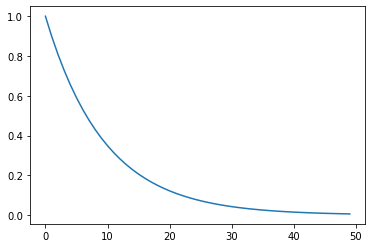

In [ ]:
x = np.arange(0,50)
y = np.power(0.9, x)
plt.plot(x, y)

multiply shop_score with weight

In [ ]:
item_x["weight"] = y
item_x["shop_score_weight"] = item_x["shop_score"] * item_x["weight"]
item_x

,item_id,shopid,score,shop_slug,shop_score,weight,shop_score_weight
0,3659422341,323441691,8.212410,reddot_official_store,0.375826,1.000000,0.375826
1,4158160712,323441691,8.158698,reddot_official_store,0.375826,0.900000,0.338244
2,4258360987,323441691,7.541995,reddot_official_store,0.375826,0.810000,0.304419
3,6758156388,323441691,7.510683,reddot_official_store,0.375826,0.729000,0.273977
4,1590530364,92564297,6.998091,sony_official_store,0.511177,0.656100,0.335383
5,10876102729,22720888,6.765673,hm.audio.store,0.547691,0.590490,0.323406
6,9037506906,397705144,6.717392,jbl_official_store,0.459799,0.531441,0.244356
7,14301514099,92564297,6.541232,sony_official_store,0.511177,0.478297,0.244494
8,8672540091,22720888,6.407036,hm.audio.store,0.547691,0.430467,0.235763
9,7758699723,323441691,6.348624,reddot_official_store,0.375826,0.387420,0.145603


In [ ]:
shop_recommendation = item_x.groupby(['shop_slug'])['shop_score_weight'].agg('sum').reset_index()
shop_recommendation = shop_recommendation.sort_values(by="shop_score_weight",ascending=False)
shop_recommendation

,shop_slug,shop_score_weight
10,reddot_official_store,1.772212
5,hm.audio.store,0.977353
12,sony_official_store,0.579878
6,jbl_official_store,0.244356
11,samsung_official_store,0.244104
3,earldom.store,0.176249
8,philips_official_store,0.175314
13,xiaomi_authorized_store,0.165266
1,bose_official_storevn,0.096117
0,banhangcaocap69,0.044816
